# Decision Tree

## Objective :
The objective of this assignment is to apply Decision Tree Classification to a given dataset,analyse the performance of the model, and interpret the results.

### Task-1 Data Preparation :
1. Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [546]:
# Import the Required Python Libraries.
import pandas as pd
import numpy as np

In [547]:
# Loading The Dataset
data=pd.read_csv("heart_disease.csv")

In [548]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,FALSE,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,False,normal,128,TRUE,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,False,normal,138,FALSE,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,True,normal,140,FALSE,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,FALSE,NaN,upsloping,fixed defect,0


In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [550]:
# Checking For Null or Missing Values.
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [551]:
# Summary Statistics.
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### Task-2 Exploratory Data Analysis(EDA) :
1. Perform exploratory data analysis to understand the structure of the dataset.
2. 
Check for missing values, outliers, and inconsistencies in the data
3. 
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [553]:
data['oldpeak'].mode()[0]

0.0

In [554]:
# Handling missing values.
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].mode()[0])

In [555]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [556]:
# Detecting Outliers using Box Plots.
import matplotlib.pyplot as plt
import seaborn as sns

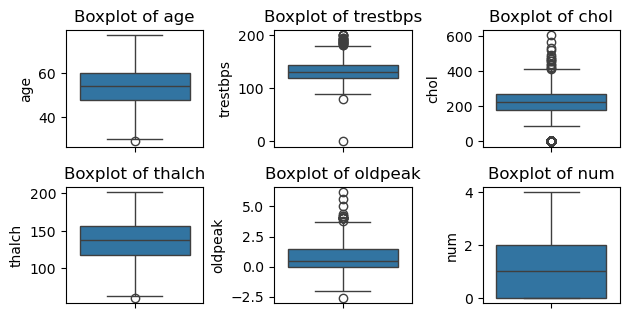

In [557]:
for i,col in enumerate(num_cols.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=num_cols[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#### Visualization of Distributions.

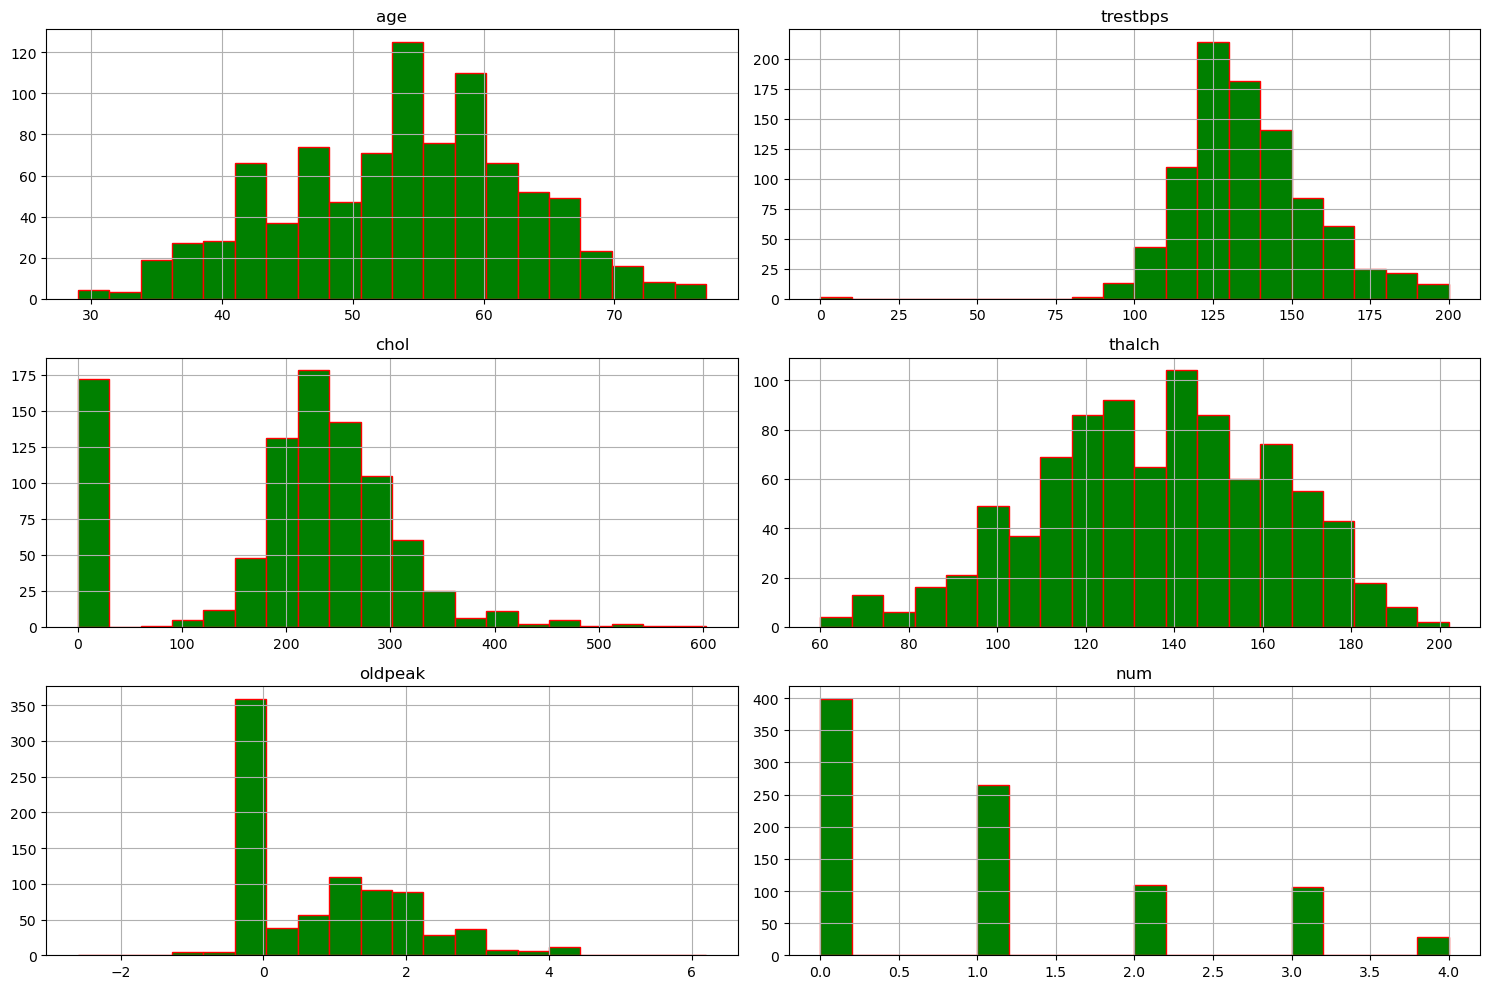

In [559]:
# Visualization of Distributions using Histograms for Each Numeric Features.
num_cols.hist(bins=20,figsize=(15,10),color='green',edgecolor='red')
plt.tight_layout()
plt.show()


#### Correlation Matrices.

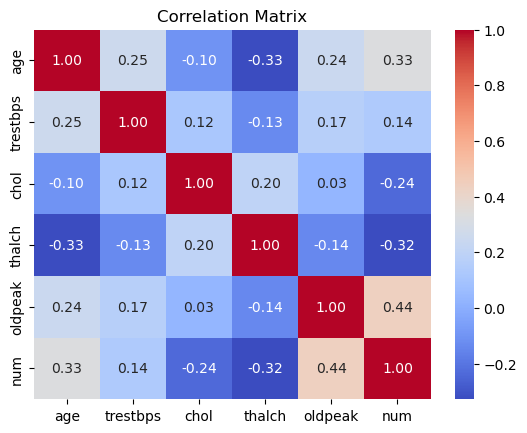

In [561]:
# Understanding the Relationships between features Using correlation heatmap.
corr_matrix=num_cols.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Task-3 Feature Engineering :
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

##### Encode Categorical Variables.

In [564]:
from sklearn import preprocessing

In [565]:
label_encoder=preprocessing.LabelEncoder()

In [566]:
data['sex']= label_encoder.fit_transform(data['sex'])
data['cp']= label_encoder.fit_transform(data['cp'])
data['fbs']= label_encoder.fit_transform(data['fbs'])
data['restecg']= label_encoder.fit_transform(data['restecg'])
data['exang']= label_encoder.fit_transform(data['exang'])
data['slope']= label_encoder.fit_transform(data['slope'])
data['thal']= label_encoder.fit_transform(data['thal'])

In [567]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [568]:
Q1=data['trestbps'].quantile(0.25)
Q3=data['trestbps'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data=data[(data['trestbps']>=lower_bound)&(data['trestbps']<= upper_bound)]

In [569]:
Q1=data['chol'].quantile(0.25)
Q3=data['chol'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
data=data[(data['chol']>=lower_bound)&(data['chol']<= upper_bound)]

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'num'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

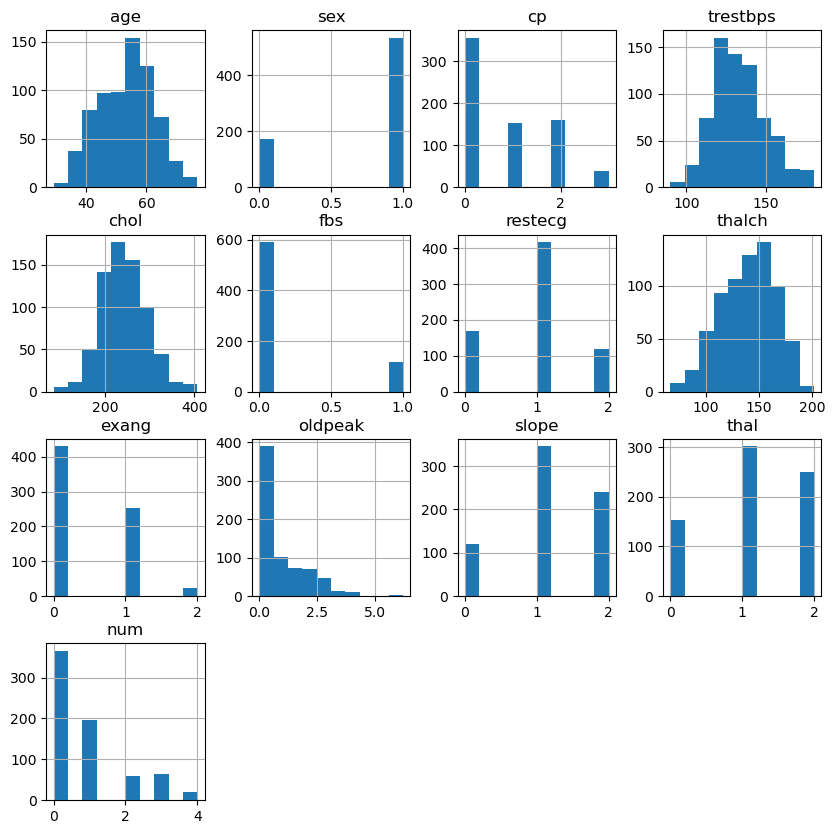

In [570]:
# Histogram plot
data.hist(figsize=(10,10))

In [571]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.044096,-0.083605,0.257881,0.065498,0.213773,-0.050277,-0.333079,0.228271,0.218004,-0.025882,0.052443,0.356532
sex,0.044096,1.000000,-0.119467,0.043251,-0.090046,0.091367,0.031451,-0.146436,0.206304,0.109410,-0.051214,0.061568,0.245668
cp,-0.083605,-0.119467,1.000000,-0.011623,-0.125200,0.017477,-0.051490,0.270447,-0.341877,-0.219864,0.104391,-0.050849,-0.328535
trestbps,0.257881,0.043251,-0.011623,1.000000,0.138693,0.166410,0.073556,-0.153649,0.163006,0.160281,0.009604,-0.008753,0.174571
chol,0.065498,-0.090046,-0.125200,0.138693,1.000000,0.034125,-0.063246,-0.004701,0.092428,0.048826,0.030304,0.014057,0.065966
fbs,0.213773,0.091367,0.017477,0.166410,0.034125,1.000000,0.036366,-0.084973,0.124585,-0.019189,-0.025996,-0.041647,0.139477
restecg,-0.050277,0.031451,-0.051490,0.073556,-0.063246,0.036366,1.000000,-0.183946,0.143594,-0.061738,-0.137016,-0.147339,-0.034588
thalch,-0.333079,-0.146436,0.270447,-0.153649,-0.004701,-0.084973,-0.183946,1.000000,-0.400167,-0.188287,0.210657,-0.019888,-0.291723
exang,0.228271,0.206304,-0.341877,0.163006,0.092428,0.124585,0.143594,-0.400167,1.000000,0.299216,-0.153710,0.064139,0.363605
oldpeak,0.218004,0.109410,-0.219864,0.160281,0.048826,-0.019189,-0.061738,-0.188287,0.299216,1.000000,-0.214862,0.108588,0.487179


<Axes: >

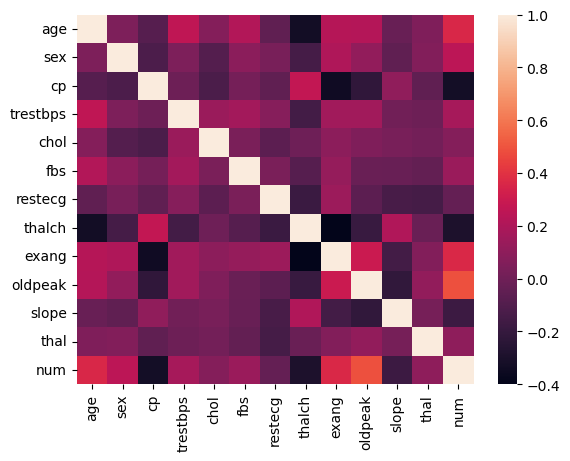

In [572]:
sns.heatmap(data.corr())

In [573]:
data=data.drop(["age"],axis=1)
x=data.iloc[:,0:11]
y=data['num']

In [574]:
print(x,y)

     sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0      1   3       145   233    1        0     150      0      2.3      0   
1      1   1       135   203    0        1     132      0      0.0      1   
2      1   0       140   192    0        1     148      0      0.4      1   
3      1   3       118   186    0        0     190      0      0.0      1   
4      1   0       110   201    0        1     126      1      1.5      1   
..   ...  ..       ...   ...  ...      ...     ...    ...      ...    ...   
899    1   0       136   248    0        1     140      1      4.0      0   
902    1   0       160   254    1        2     108      1      3.0      1   
904    1   0       166   170    0        2     120      1      3.0      1   
906    1   2       144   208    1        2     105      2      0.0      0   
907    1   0       142   277    1        2     182      0      0.0      1   

     thal  
0       0  
1       0  
2       0  
3       0  
4       0  
.. 

In [575]:
print(data['num'].unique())
colnames=list(data.columns)
colnames

[0 1 2 3 4]


['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

### Task-4 Decision Tree Classification :
1. Split the dataset into training and testing sets (e.g., using an 80-20 split).
2. Implement a Decision Tree Classification model using a library like scikit-learn.
3. Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [577]:
from sklearn.model_selection import train_test_split

In [578]:
# Split the data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

##### Initialize the Decision Tree model.

In [580]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [581]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

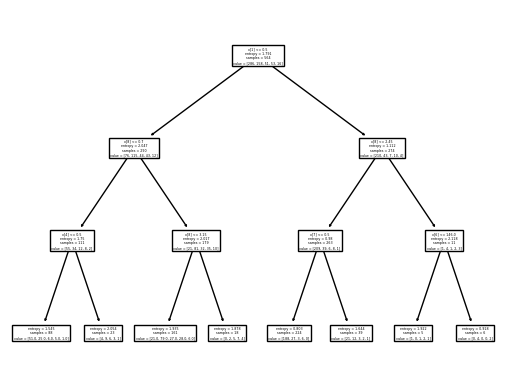

In [582]:
tree.plot_tree(model);

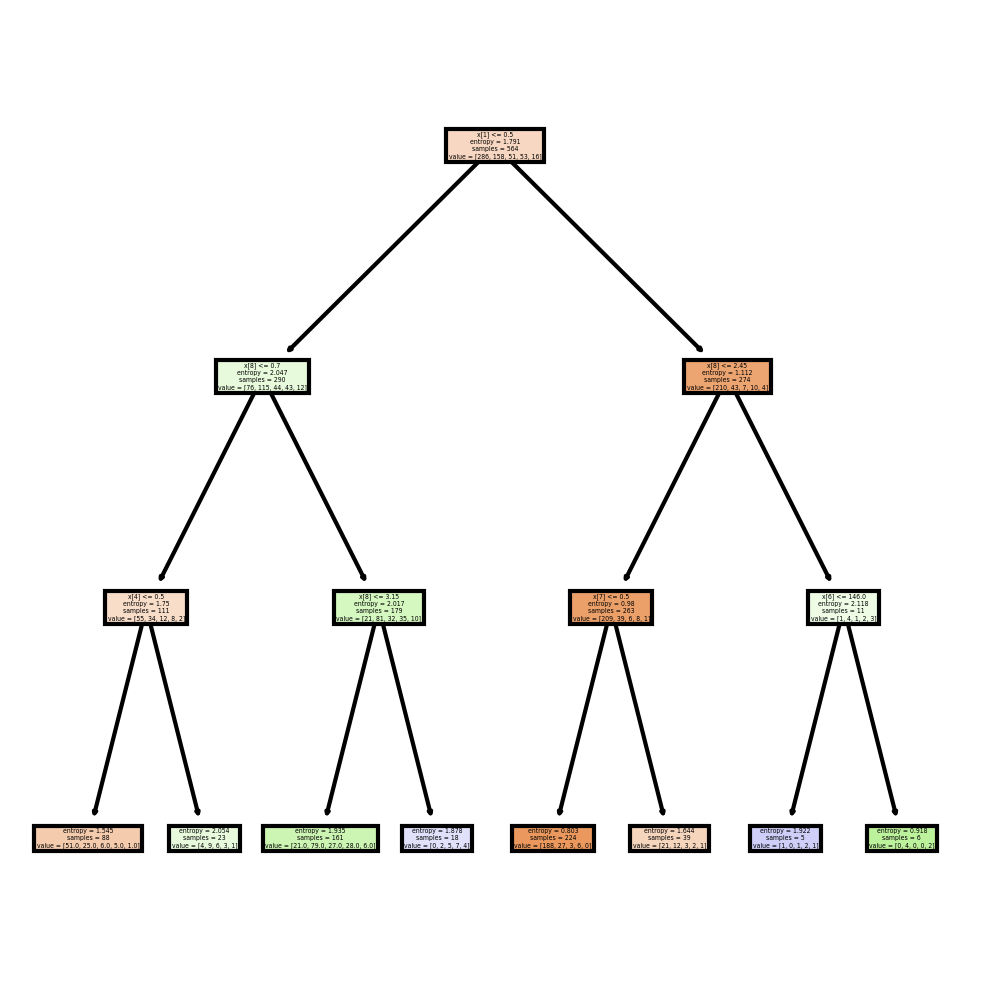

In [583]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,filled=True);

In [584]:
# Predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    98
1    42
3     2
Name: count, dtype: int64

In [585]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        80
           1       0.37      0.39      0.38        38
           2       0.11      0.12      0.12         8
           3       0.00      0.00      0.00        11
           4       0.14      0.20      0.17         5

    accuracy                           0.56       142
   macro avg       0.28      0.30      0.29       142
weighted avg       0.54      0.56      0.55       142



In [586]:
np.mean(preds==y_test)

0.6338028169014085

### Building Decision Tree Classifier

In [588]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [589]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [590]:
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [591]:
model1_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model1_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [592]:
pred=model1_gini.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [593]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

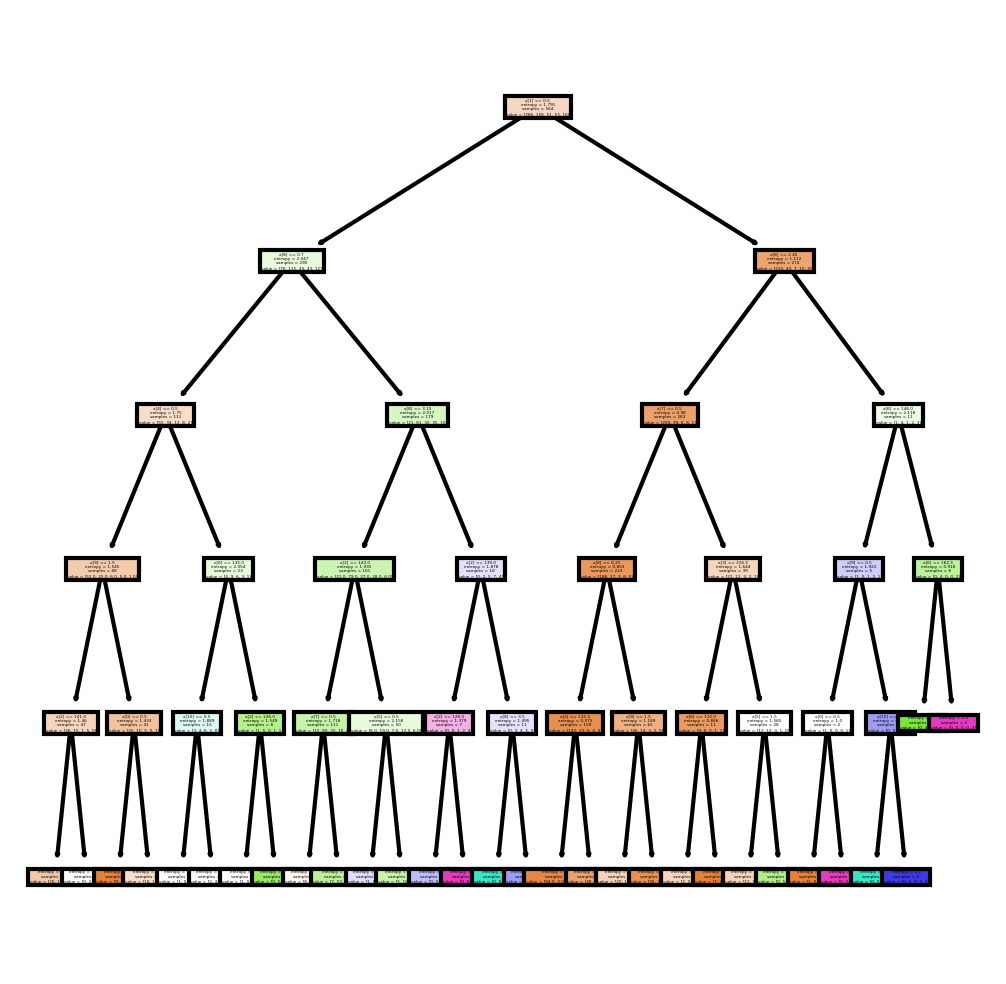

In [594]:
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model1,filled=True);

In [595]:
pred=model1.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

In [596]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=7)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [597]:
pred=model2.predict(x_test)
np.mean(preds==y_test)

0.6338028169014085

#### 1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Some common hyperparameters of decision tree models include the depth of the tree, minimum samples required to split a node, minimum samples required at a leaf node, and the splitting criterion (e.g., Gini impurity or entropy). These hyperparameters control the complexity of the model. A deeper tree can capture more details but may lead to overfitting. Restricting the number of splits or samples can prevent overfitting but may result in underfitting if set too high.

#### 2. What is the difference between the Label encoding and One-hot encoding?
Label encoding assigns each category a unique integer value, making it suitable for ordinal data. In contrast, one-hot encoding creates binary columns for each category, representing each as a vector with a 1 in the corresponding column. Label encoding is efficient in terms of memory but may introduce unintended order, while one-hot encoding avoids this but can lead to high-dimensional data, especially with many categories.
